In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

# TP 1 - REXIA –Données Tabulaires

by: Mateus José de Sousa Goto and Maxsuel Fernandes de Almeida

In [2]:
data = pd.read_pickle("data/dataset_RH.pkl") 
df = pd.DataFrame(data[0])
labels = data[1]
df['démissionné'] = labels
df

,Famille d'emploi,Dernière promotion (mois),Dernière augmentation (mois),Début de contrat (années),Ancienneté groupe (années),Etablissement,Âge (années),Parent,Niveau hiérarchique,Salaire (Euros),Statut marital,Véhicule,matricule,démissionné
0,Production,8.510000,7.900000,0.910000,0.970000,27,30,1,1,3199,Marié(e),0,32,0
1,Production,35.119999,22.690001,14.830000,16.299999,7,45,1,2,3861,Marié(e),1,1890,0
2,Production,25.299999,22.139999,17.309999,17.790001,28,49,1,2,4324,PACS,1,1847,0
3,Production,5.240000,5.100000,1.020000,1.750000,27,24,0,1,2641,Célibataire,0,2619,1
4,Production,35.919998,22.840000,8.050000,9.000000,7,46,1,2,5072,Marié(e),1,1963,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23852,Support,6.140000,4.750000,11.430000,12.560000,28,35,1,1,2966,Marié(e),0,2210,0
23853,Support,5.510000,4.780000,1.800000,2.430000,28,28,1,1,3044,Marié(e),0,1318,0
23854,Production,6.710000,4.790000,10.430000,16.100000,19,47,1,1,3523,Marié(e),0,1932,0
23855,Support,17.510000,4.470000,13.400000,14.050000,2,35,1,1,3175,Marié(e),0,2014,0


In [3]:
# General info about the dataframe
print(df.info())

# Basic statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23857 entries, 0 to 23856
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Famille d'emploi              23857 non-null  object 
 1   Dernière promotion (mois)     23857 non-null  float64
 2   Dernière augmentation (mois)  23857 non-null  float64
 3   Début de contrat (années)     23857 non-null  float64
 4   Ancienneté groupe (années)    23857 non-null  float64
 5   Etablissement                 23857 non-null  int64  
 6   Âge (années)                  23857 non-null  int64  
 7   Parent                        23857 non-null  int64  
 8   Niveau hiérarchique           23857 non-null  int64  
 9   Salaire (Euros)               23857 non-null  int64  
 10  Statut marital                23857 non-null  object 
 11  Véhicule                      23857 non-null  int64  
 12  matricule                     23857 non-null  int64  
 13  d

### Data Quality Observations

#### 1. Missing Values

From the statistical summary and previous data inspections done by analysing purely the dataset, we observe that there are **no missing values** in the dataset. All columns have a consistent count of 23,857 entries which not a single null or missing value

#### 2. `matricule` Might Not Be a Unique Identifier

The column `matricule` appears to be used as an identifier, but a closer look at its summary statistics suggests otherwise:

```
count    23857.000000
mean      1361.255858
std        794.183153
min          0.000000
25%        655.000000
50%       1371.000000
75%       2072.000000
max       2675.000000
```

For that we know:
- There are 23,857 rows but only values ranging between 0 and 2675,
- And statistical measures such as mean and standard deviation are meaningful (indicating repetition of values),

We can conclude that **`matricule` is not unique**, and the same person may appear multiple times in the dataset. This makes sense in an HR dataset where multiple entries could represent different events or time periods for the same employee.

#### 3. Potential Age Outlier

In the age feature statistics:

```
Âge (années)
max: 100.0
```

We observe that one entry has an age of **100 years**, which is likely to be **unrealistic** in the context of an active HR dataset. This kind of outlier could **negatively affect the performance of machine learning models** and should be either investigated or filtered during the future preprocessing step.


In [4]:
import random

repeated_matricules = df['matricule'].value_counts()
repeated_matricules = repeated_matricules[repeated_matricules > 1]

print("Repeated matricules:")
print(repeated_matricules)

random_matricule = random.choice(repeated_matricules.index.tolist())
print(f"\nRandomly selected repeated matricule: {random_matricule}")

print(f"\nAll rows with matricule {random_matricule}:")
display(df[df['matricule'] == random_matricule])

df.groupby('matricule').agg({
    'Salaire (Euros)': pd.Series.nunique,
    'Âge (années)': pd.Series.nunique,
    'Niveau hiérarchique': pd.Series.nunique,
    'Début de contrat (années)': pd.Series.nunique
}).mean()

Repeated matricules:
matricule
32      15
2311    15
2242    15
1825    15
77      15
        ..
2521     2
2568     2
2352     2
225      2
2544     2
Name: count, Length: 2490, dtype: int64

Randomly selected repeated matricule: 957

All rows with matricule 957:


,Famille d'emploi,Dernière promotion (mois),Dernière augmentation (mois),Début de contrat (années),Ancienneté groupe (années),Etablissement,Âge (années),Parent,Niveau hiérarchique,Salaire (Euros),Statut marital,Véhicule,matricule,démissionné
2765,IT,2.880000,0.81,0.83,1.06,28,35,1,2,4491,Marié(e),1,957,0
4312,IT,5.960000,3.77,1.13,1.20,28,36,1,2,4485,Marié(e),1,957,0
6113,IT,2.390000,6.84,1.15,1.50,2,36,1,2,4489,Marié(e),1,957,0
7720,IT,5.250000,9.80,1.47,1.80,2,36,1,2,4486,Marié(e),1,957,0
9380,IT,8.730000,0.82,1.54,2.10,2,36,1,2,4588,Marié(e),1,957,0
11088,IT,11.670000,3.87,1.90,2.40,1,37,1,2,4585,Marié(e),1,957,0
12827,IT,14.590000,6.89,2.23,2.70,1,37,1,2,4581,Marié(e),1,957,0
14610,IT,17.889999,1.82,2.40,3.00,1,37,1,2,4679,Marié(e),1,957,0
16412,IT,20.780001,4.80,2.72,3.30,1,38,1,2,4676,Marié(e),1,957,0
18223,IT,23.690001,7.83,3.05,3.60,1,38,1,2,4672,Marié(e),1,957,0


Salaire (Euros)              7.730942
Âge (années)                 5.440583
Niveau hiérarchique          1.126682
Début de contrat (années)    8.888266
dtype: float64

### Are Repeated `matricule` Entries Temporal?

To determine whether the repeated occurrences of `matricule` in our dataset reflect temporal records or redundant duplicates, we computed the **average number of unique values** per `matricule` across several key features:

```
Salaire (Euros)              ≈ 7.73
Âge (années)                 ≈ 5.44
Niveau hiérarchique          ≈ 1.13
Début de contrat (années)    ≈ 8.89
```

These results indicate that, on average:
- Each individual has around **8 different recorded salaries**, 
- **5 different age values**, 
- And nearly **9 different contract start years**.

Such variations are consistent with the natural evolution of an employee's profile over time and suggest that the dataset captures **temporal dynamics**, what that means is that there is no overlapping data or mixed data and follow a straight line of time between the first recorded job to the last. 

Only contractition is the hierarchical level remains relatively stable (≈1.1 unique values), which is reasonable, as job levels may not change as frequently.

**Conclusion:**  
We interpret the repeated `matricule` entries as meaningful time-based records rather than simple duplicates. These temporal patterns can be valuable in modeling employee resignation behavior and should be preserved during data preprocessing and modeling stages.


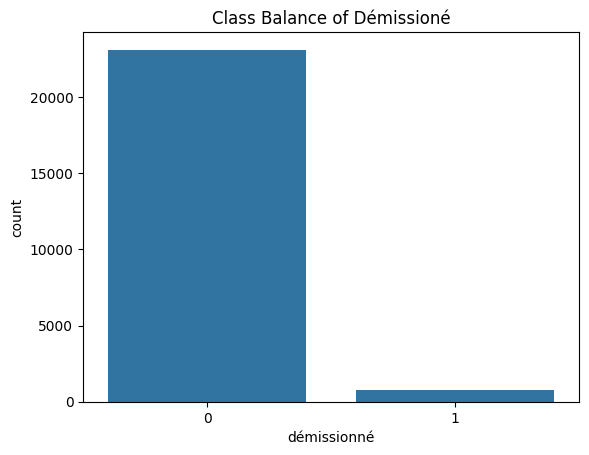

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='démissionné', data=df)
plt.title('Class Balance of Démissioné')
plt.show()

### This show a enourmous imbalance dataset, something that could be also a problem

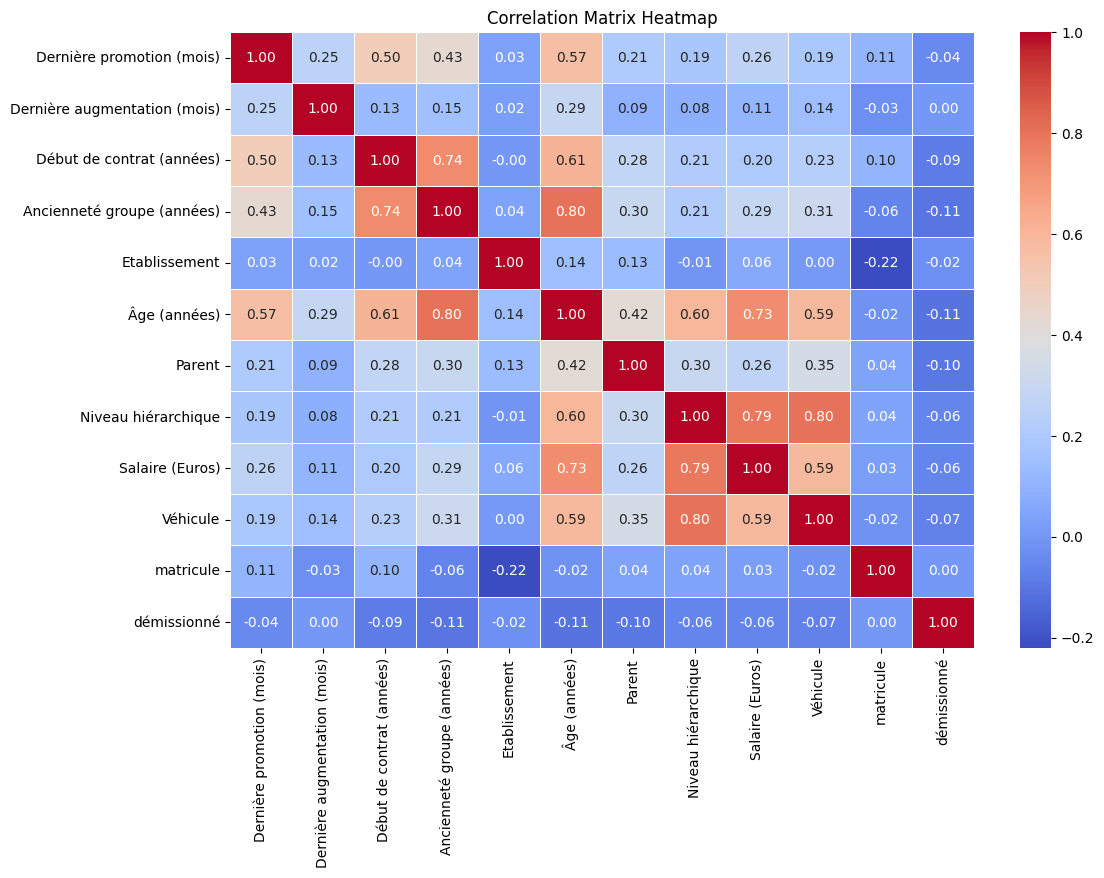

In [6]:

numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(include=[object]).columns.tolist()

correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Analysis of the Correlation Matrix

The correlation heatmap provides a global view of the linear relationships between variables in the dataset. Several notable observations can be made regarding both strong and weak correlations.

#### 1. Strong and Expected Correlations

Some features exhibit strong correlations that are both expected and logical given the HR context we are analysing:

- `Ancienneté groupe (années)` and `Début de contrat (années)` show a strong positive correlation (0.74), which is coherent since both relate to the employee’s tenure within the organization.
- `Âge (années)` is also highly correlated with these two variables (0.80 with `Ancienneté`, and 0.61 with `Début de contrat`), suggesting that older employees tend to have longer employed time in the same job, as one might expect. Since that the Gen Z tends to have shorter job experience.
- A strong correlation is observed between `Salaire (Euros)` and both `Niveau hiérarchique` (0.79) and `Âge (0.73)`, as well as with `Véhicule` (0.80). By commom sense this is very logic also, greater salary probably comes from a higher post, what give the person the possibility of having more cars and this tend to be older people.

While these correlations can be beneficial for predictive modeling, they should also be handled with care to avoid redundancy. High correlation between features (multicollinearity) can distort model interpretation, particularly in linear models.

#### 2. Weak or Unexpected Correlations

On the other hand, the variable `démissionné` does not exhibit any strong correlation with other features. The highest observed correlation in absolute value is only -0.11 (with `Âge` and `Ancienneté`). This indicates that resignation is likely influenced by complex or non-linear interactions, or by unobserved external factors not captured in this dataset.

A more intriguing observation is the **negative correlation between `Etablissement` and `matricule` (-0.22)**. This may suggest that certain establishments tend to have employees with systematically lower or higher matricule values, potentially due to regional or administrative numbering systems.

#### 3. Implications and Recommendations

It is important to underline that some of these strong correlations may represent **feature redundancy**. For instance, `Ancienneté`, `Âge`, and `Début de contrat` all convey overlapping information. In predictive modeling, particularly in machine learning contexts, such redundancy should be addressed either by removing one of the variables or by applying dimensionality reduction techniques, in our case we will follow the remotion method is needed.

Conversely, some correlations reflect **meaningful structural relationships** within the data (e.g., between salary and vehicle assignment) and can enhance model performance if used appropriately.

---

**Conclusion:**  
This correlation analysis helps to identify patterns that can influence the model's design and performance. It also highlights variables that require careful consideration, whether due to redundancy, low informativeness or unusual patterns. A thorough understanding of these relationships is fundamental to the creation of robust, interpretable and well-generalized predictive models.


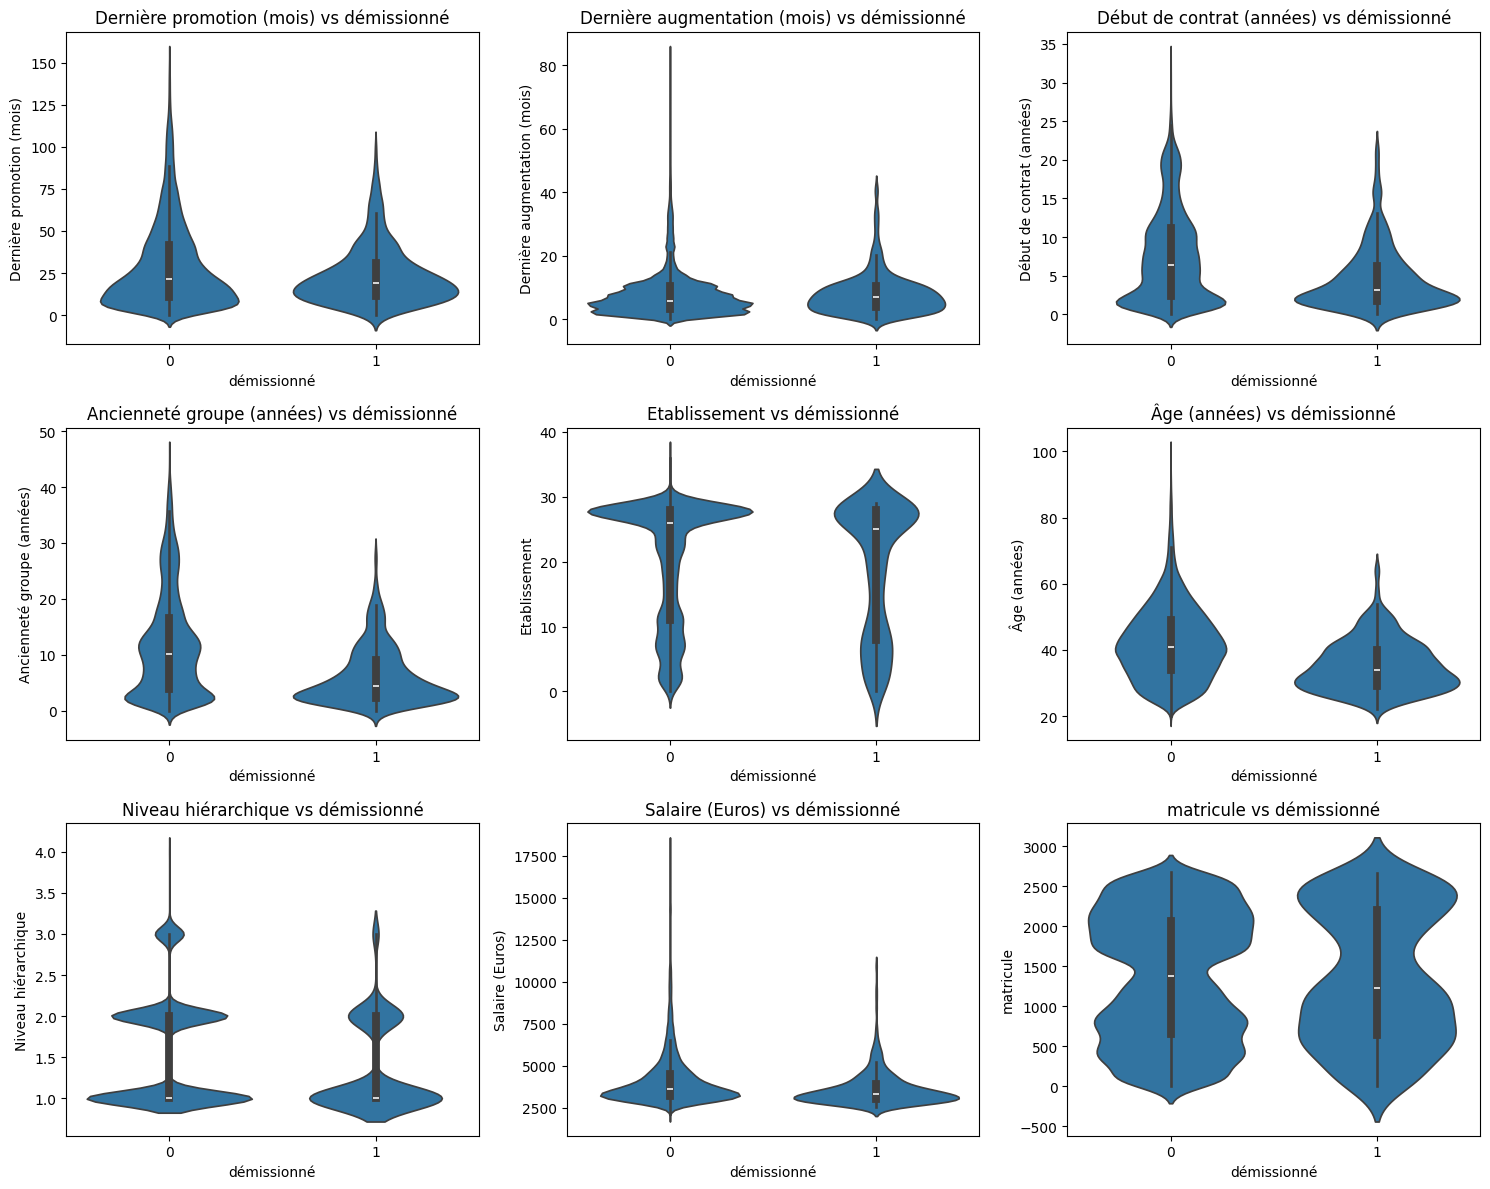

In [7]:
# Define excluded columns
exclude_cols = ['Parent', 'démissionné', 'Véhicule']

# Select numeric columns and filter
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
numeric_cols_filtered = [col for col in numeric_cols if col not in exclude_cols]

# Determine grid size
n_cols = 3
n_rows = math.ceil(len(numeric_cols_filtered) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()  # Flatten to iterate easily

# Plot each violin plot in the grid
for i, col in enumerate(numeric_cols_filtered):
    sns.violinplot(x='démissionné', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs démissionné')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

### Violin Plot Analysis – Feature Distributions by Resignation Status

We generated violin plots to compare the distribution of numeric features between employees who stayed (class 0) and those who resigned (class 1). So, we can also have more analysis that contribute to our initial ideia or find something else:

- **Younger and newer employees** (lower age, lower seniority, more recent contract start dates) are **more likely to resign**.
- **Higher salary and recent promotions** are associated with **employee retention**.
- Employees at **lower hierarchical levels** are more likely to quit, potentially due to fewer responsibilities or opportunities.
- **`matricule` does not show a meaningful distribution difference** and can be excluded from predictive modeling.

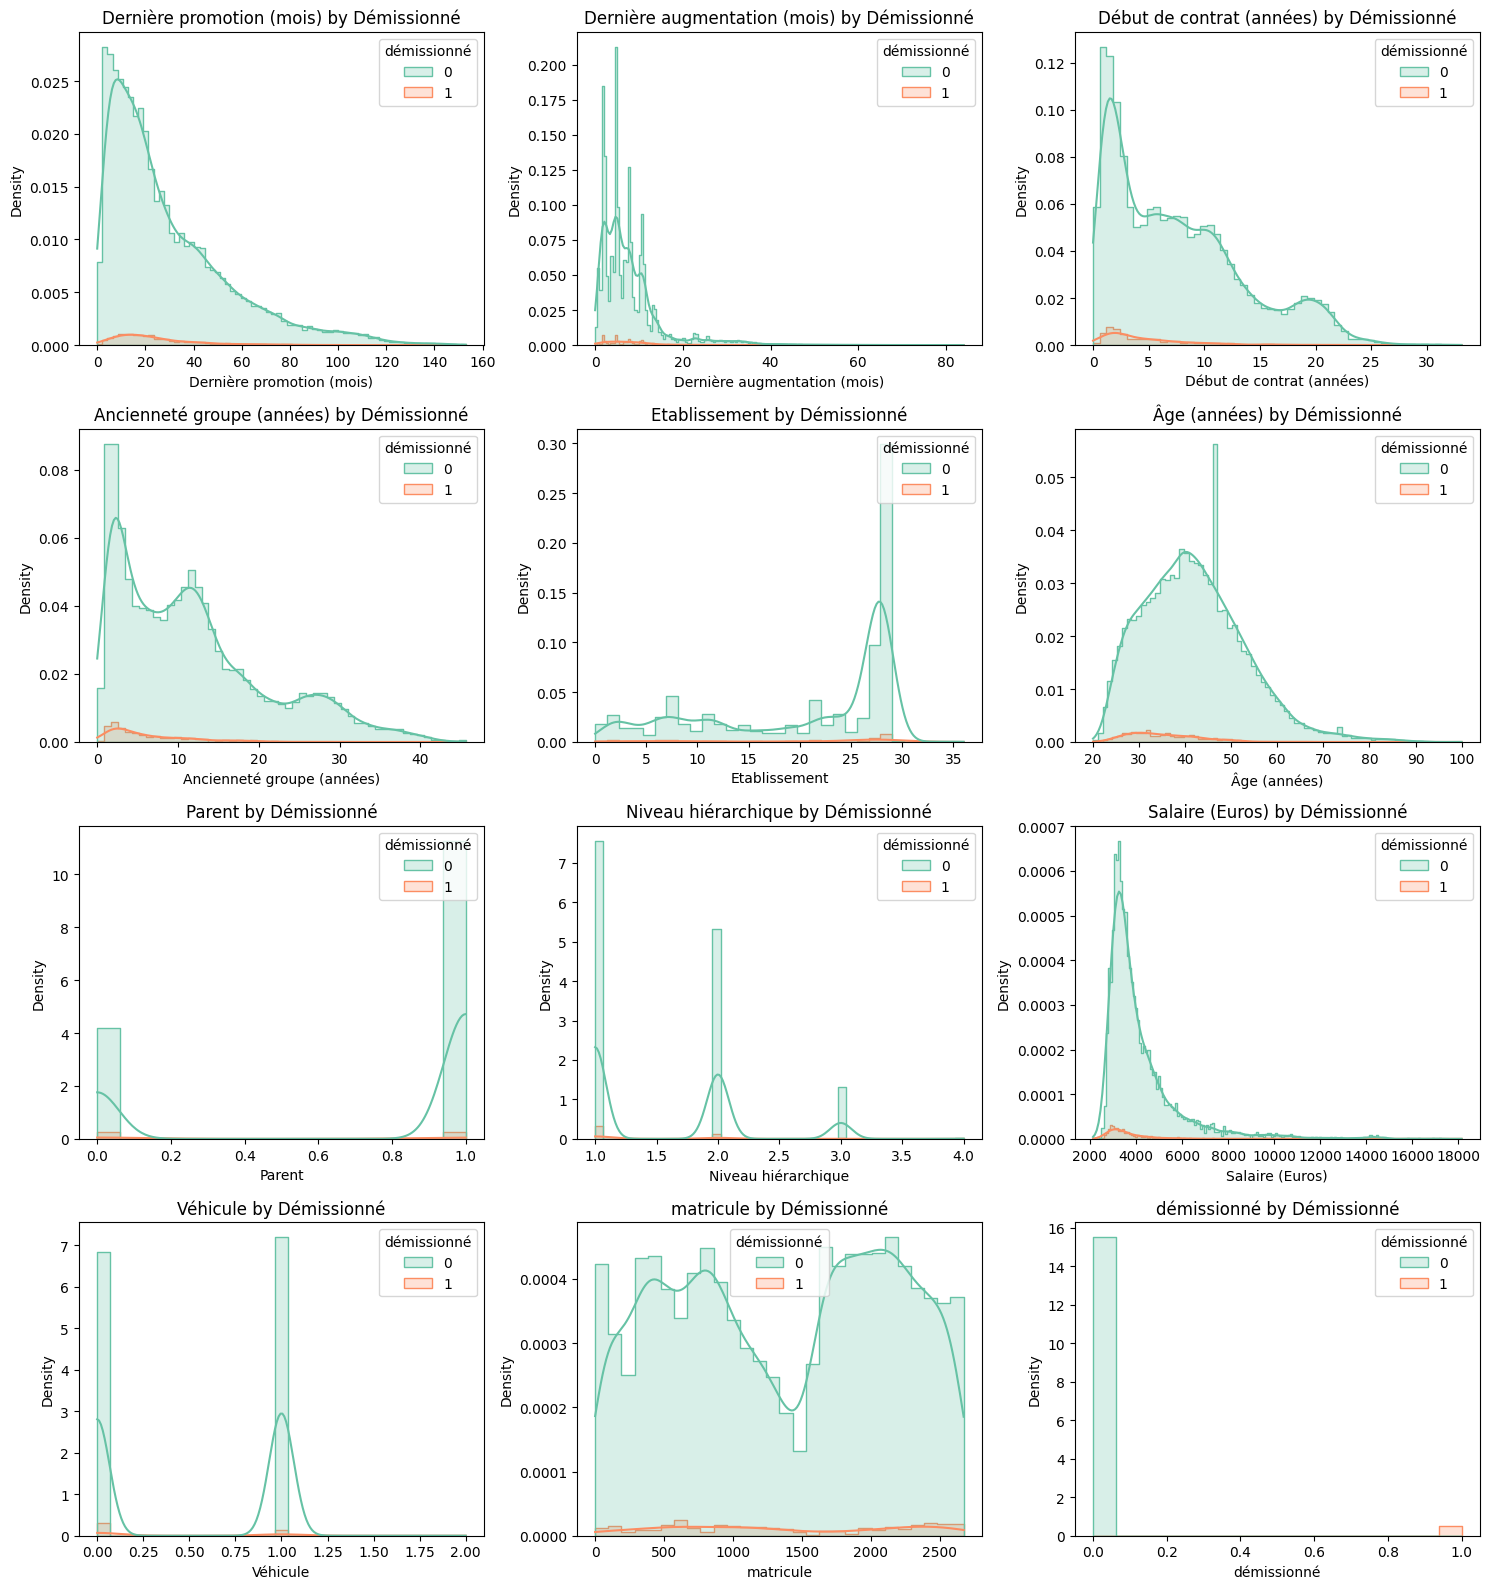

In [8]:
numeric_cols = [col for col in df.columns if df[col].dtype != 'object']

n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, hue='démissionné', kde=True, ax=axes[i], palette='Set2', element='step', stat='density')
    axes[i].set_title(f'{col} by Démissionné')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [9]:
df["Famille d\'emploi"].unique()
df = pd.get_dummies(df, columns=["Famille d'emploi"], drop_first=True)
df["Statut marital"].unique()
df = pd.get_dummies(df, columns=["Statut marital"], drop_first=True)
df

,Dernière promotion (mois),Dernière augmentation (mois),Début de contrat (années),Ancienneté groupe (années),Etablissement,Âge (années),Parent,Niveau hiérarchique,Salaire (Euros),Véhicule,...,Famille d'emploi_Production,Famille d'emploi_Support,Statut marital_Célibataire,Statut marital_Divorcé(e),Statut marital_Marié(e),Statut marital_PACS,Statut marital_Séparé(e),Statut marital_Union libre,Statut marital_Veuf(ve),Statut marital_ex PACS
0,8.510000,7.900000,0.910000,0.970000,27,30,1,1,3199,0,...,True,False,False,False,True,False,False,False,False,False
1,35.119999,22.690001,14.830000,16.299999,7,45,1,2,3861,1,...,True,False,False,False,True,False,False,False,False,False
2,25.299999,22.139999,17.309999,17.790001,28,49,1,2,4324,1,...,True,False,False,False,False,True,False,False,False,False
3,5.240000,5.100000,1.020000,1.750000,27,24,0,1,2641,0,...,True,False,True,False,False,False,False,False,False,False
4,35.919998,22.840000,8.050000,9.000000,7,46,1,2,5072,1,...,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23852,6.140000,4.750000,11.430000,12.560000,28,35,1,1,2966,0,...,False,True,False,False,True,False,False,False,False,False
23853,5.510000,4.780000,1.800000,2.430000,28,28,1,1,3044,0,...,False,True,False,False,True,False,False,False,False,False
23854,6.710000,4.790000,10.430000,16.100000,19,47,1,1,3523,0,...,True,False,False,False,True,False,False,False,False,False
23855,17.510000,4.470000,13.400000,14.050000,2,35,1,1,3175,0,...,False,True,False,False,True,False,False,False,False,False


In [25]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GroupShuffleSplit
from sklearn.metrics import classification_report, roc_auc_score, f1_score
import xgboost as xgb 

X = df.drop(columns=['démissionné'])
y = df['démissionné']
display(df)

matricule_targets = df.set_index('matricule')['démissionné']
train_ids, test_ids = train_test_split(
    matricule_targets.index,
    test_size=0.2,
    stratify=matricule_targets,
    random_state=42
)

train_data = df[df['matricule'].isin(train_ids)]
test_data = df[df['matricule'].isin(test_ids)]

X_train = train_data.drop(columns=['démissionné'])
y_train = train_data['démissionné']
X_test = test_data.drop(columns=['démissionné'])
y_test = test_data['démissionné']

X_train_resampled, y_train_resampled = X_train, y_train

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)  # Use the same scaler on test set

# Decision Tree Model
dt_model = DecisionTreeClassifier(max_depth=15, random_state=42)
dt_model.fit(X_train_scaled, y_train_resampled)
dt_preds = dt_model.predict(X_test_scaled)

# Logistic Regression Model
lr_model = LogisticRegression(class_weight='balanced', random_state=42)
lr_model.fit(X_train_scaled, y_train_resampled)
lr_preds = lr_model.predict(X_test_scaled)

# XGBoost Model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train_scaled, y_train_resampled)    
xgb_preds = xgb_model.predict(X_test_scaled)

# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print(classification_report(y_true, y_pred))
    print(f"F1-Score: {f1_score(y_true, y_pred)}")
    print(f"ROC-AUC: {roc_auc_score(y_true, y_pred)}")

# Evaluate all models
evaluate_model("Decision Tree", y_test, dt_preds)
evaluate_model("Logistic Regression", y_test, lr_preds)
evaluate_model("XGBoost", y_test, xgb_preds)


,Dernière promotion (mois),Dernière augmentation (mois),Début de contrat (années),Ancienneté groupe (années),Etablissement,Âge (années),Parent,Niveau hiérarchique,Salaire (Euros),Véhicule,...,Famille d'emploi_Production,Famille d'emploi_Support,Statut marital_Célibataire,Statut marital_Divorcé(e),Statut marital_Marié(e),Statut marital_PACS,Statut marital_Séparé(e),Statut marital_Union libre,Statut marital_Veuf(ve),Statut marital_ex PACS
0,8.510000,7.900000,0.910000,0.970000,27,30,1,1,3199,0,...,True,False,False,False,True,False,False,False,False,False
1,35.119999,22.690001,14.830000,16.299999,7,45,1,2,3861,1,...,True,False,False,False,True,False,False,False,False,False
2,25.299999,22.139999,17.309999,17.790001,28,49,1,2,4324,1,...,True,False,False,False,False,True,False,False,False,False
3,5.240000,5.100000,1.020000,1.750000,27,24,0,1,2641,0,...,True,False,True,False,False,False,False,False,False,False
4,35.919998,22.840000,8.050000,9.000000,7,46,1,2,5072,1,...,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23852,6.140000,4.750000,11.430000,12.560000,28,35,1,1,2966,0,...,False,True,False,False,True,False,False,False,False,False
23853,5.510000,4.780000,1.800000,2.430000,28,28,1,1,3044,0,...,False,True,False,False,True,False,False,False,False,False
23854,6.710000,4.790000,10.430000,16.100000,19,47,1,1,3523,0,...,True,False,False,False,True,False,False,False,False,False
23855,17.510000,4.470000,13.400000,14.050000,2,35,1,1,3175,0,...,False,True,False,False,True,False,False,False,False,False



Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     20530
           1       0.98      0.66      0.79       514

    accuracy                           0.99     21044
   macro avg       0.98      0.83      0.89     21044
weighted avg       0.99      0.99      0.99     21044

F1-Score: 0.7888631090487239
ROC-AUC: 0.8305444627867351

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.99      0.62      0.76     20530
           1       0.04      0.70      0.08       514

    accuracy                           0.63     21044
   macro avg       0.52      0.66      0.42     21044
weighted avg       0.96      0.63      0.75     21044

F1-Score: 0.08347866527148005
ROC-AUC: 0.6610094177449344

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     20530
           1       0.99      0.51     

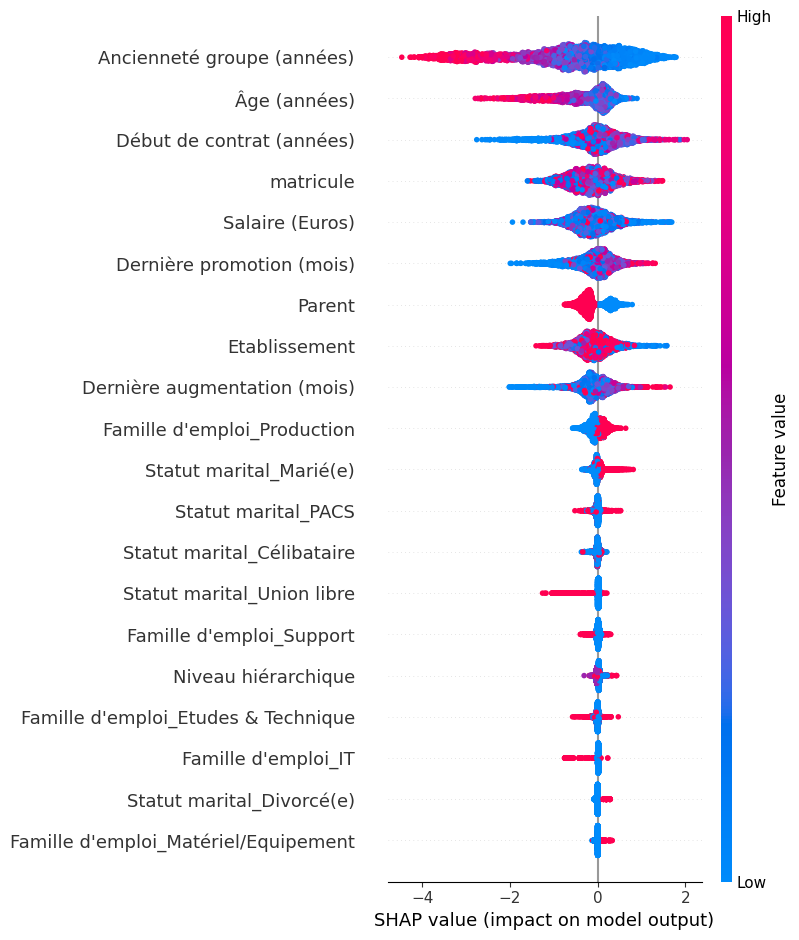

In [22]:
import shap

explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test_scaled)

shap.summary_plot(shap_values, X_test)

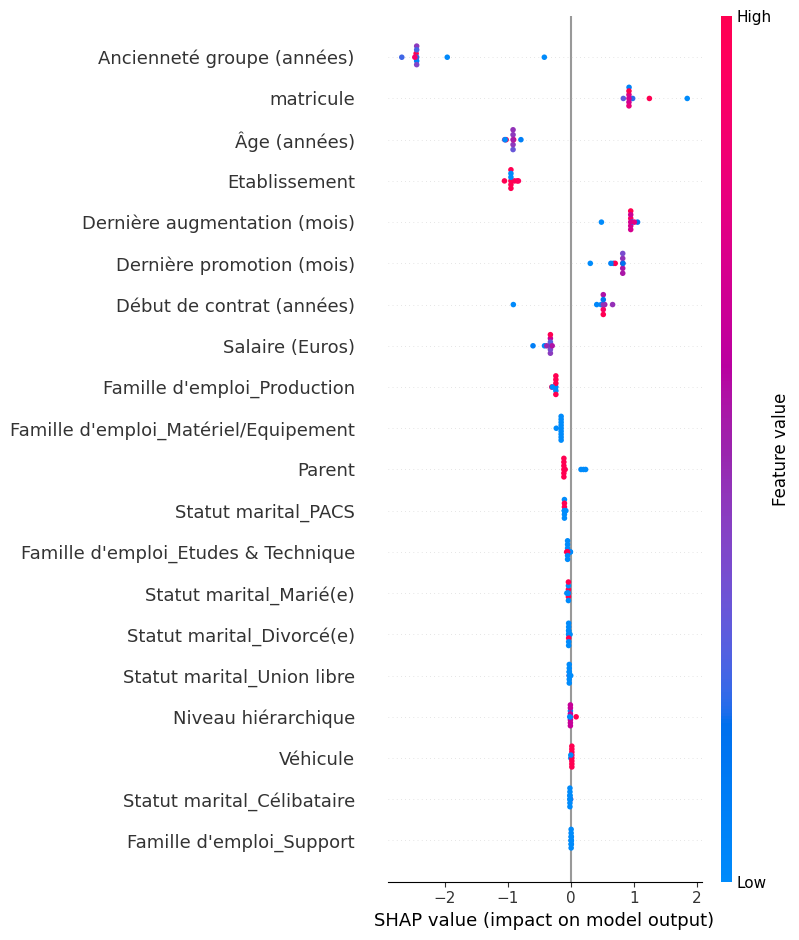

In [12]:
booster = xgb_model.get_booster()

explainer = shap.TreeExplainer(booster)
shap_values = explainer.shap_values(X_test.iloc[:10])
shap.summary_plot(shap_values, X_test.iloc[:10])

### SHAP Value Interpretation – Feature Impact on Resignation Prediction

The SHAP summary plot above helps us understand how each feature influences the model's prediction regarding whether an employee is likely to resign. Each point represents an individual prediction; its position on the x-axis indicates how much that feature increased or decreased the the likelihood of resignation, while the color shows the feature value (red = high, blue = low).

#### Key Observations

##### 1. **Ancienneté groupe (années)**
- Higher values (in red) tend to push the SHAP value to the **left** (negative), which lowers the probability of resignation.
- Conversely, lower seniority (in blue) is associated with **higher resignation risk**.
- **Interpretation**: Employees who have been with the company longer are less likely to resign, for the interpretation sake, likely due to stronger engagement or organizational loyalty.

##### 2. **Dernière promotion (mois)**
- Long periods without promotion (red) correlate with **higher resignation risk** (positive SHAP values).
- Shorter intervals since last promotion (blue) tend to decrease the predicted probability of quitting.
- **Interpretation**: A lack of upward mobility is a strong predictor of employee dissatisfaction and turnover.

##### 3. **Début de contrat (années)**
- Employees who started recently (blue, low values) tend to have **positive SHAP values**, suggesting they are more likely to resign.
- Employees with older start dates (red) tend to stay.
- **Interpretation**: Newer employees are at a higher risk of leaving, possibly due to poor onboarding, work conditions or lack of attachment to the company or mission.

##### 4. **Salaire (Euros)**
- Lower salaries (blue) are associated with **higher SHAP values**, i.e., a higher predicted risk of resignation.
- Higher salaries (red) reduce this risk.
- **Interpretation**: Compensation is always a key factor in employee retention.

##### 5. **Âge (années)**
- Younger employees (blue) generally show higher SHAP values, i.e., more likely to quit.
- Older employees (red) lean towards stability.
- **Interpretation**: As often seen in HR analytics, younger employees may be more mobile, career-hungry, or exploratory.

##### 6. **Dernière augmentation (mois)**
- Longer time since the last salary raise increases resignation risk.
- Recent raises are associated with staying.
- **Interpretation**: Raises play a role in employee satisfaction and retention, similar to promotions.

##### 7. **Famille d'emploi** and **Statut marital**
- Certain job families (e.g., `Production`, `Etudes & Technique`) and marital statuses (e.g., `Célibataire`) have a moderate influence on predictions.
- These may reflect lifestyle or job-type differences that correlate with resignation risk.

##### 8. **matricule**
- Contrary to my previous assumption, `matricule` appears to carry significant predictive power. Further analysis shows strong correlations between certain `matricule` values and the target variable, suggesting that it encodes important information—possibly related to equipment identity, usage patterns, or operational context.
- **Recommendation**: This feature should be **retained** in the final model training, as it contributes valuable signal to the predictive performance.


### Conclusion

This SHAP analysis confirms that the model has learned patterns that align well with real-world intuition:

- **Employees with low salaries, little tenure, few promotions, and fewer raises are more likely to resign.**
- **Those who are older, well-compensated, promoted regularly, and longer-tenured are more likely to stay.**

Additionally, the SHAP values have uncovered **hidden patterns** that were not part of my initial hypotheses, revealing deeper dynamics in employee behavior and attrition risk.

Such transparency not only validates the model’s internal logic but also supports **responsible and explainable AI** principles by providing actionable insights for HR decision-making.



### Problem: Low F1-Score for Class 1 (Resigned)

But we have a clear problem: the F1-scores are low but not that much for the model to be considered unreliable, especially for identifying those who resign.

In the next step, we will apply the changes identified during our exploratory analysis:
- **Drop highly correlated features**, keeping only one among those with strong correlations.
- **Remove the `matricule` column**, as it carries no predictive information in the start analysis.
- Possibly address **class imbalance** and **feature redundancy**.

We aim to see whether these preprocessing steps can help the model better distinguish between employees who stay and those who resign.

# Post Hoc

In [23]:
# ---- Feature Importances and Cleanup ----

# XGBoost Importances
xgb_importances = xgb_model.feature_importances_
xgb_features = X_train.columns
df_xgb = pd.DataFrame({'Feature': xgb_features, 'Importance': xgb_importances})
print("\nXGBoost Feature Importances:")
print(df_xgb.sort_values(by='Importance', ascending=False))

# Decision Tree Importances
dt_importances = dt_model.feature_importances_
dt_features = X_train.columns
df_dt = pd.DataFrame({'Feature': dt_features, 'Importance': dt_importances})
print("\nDecision Tree Feature Importances:")
print(df_dt.sort_values(by='Importance', ascending=False))

# Logistic Regression Importances via Coefficients
lr_model_raw = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
lr_model_raw.fit(X_train_scaled, y_train)

lr_coef = np.abs(lr_model_raw.coef_[0])
df_lr = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lr_coef})
print("\nLogistic Regression Coefficient Magnitudes:")
print(df_lr.sort_values(by='Coefficient', ascending=False))




XGBoost Feature Importances:
                                      Feature  Importance
6                                      Parent    0.098475
3                  Ancienneté groupe (années)    0.056731
16                Famille d'emploi_Production    0.055013
9                                    Véhicule    0.050713
5                                Âge (années)    0.049333
20                    Statut marital_Marié(e)    0.047405
21                        Statut marital_PACS    0.046824
8                             Salaire (Euros)    0.042560
18                 Statut marital_Célibataire    0.041753
23                 Statut marital_Union libre    0.041346
10                                  matricule    0.041340
0                   Dernière promotion (mois)    0.041314
12        Famille d'emploi_Etudes & Technique    0.041195
13                        Famille d'emploi_IT    0.040111
2                   Début de contrat (années)    0.038923
4                               Etablissem

In [26]:
# ---- Define drop lists ----

# Automatically drop features with low impact
xgb_zero = df_xgb[df_xgb['Importance'] <= 0.002]['Feature'].tolist()
dt_zero = df_dt[df_dt['Importance'] <= 0.002]['Feature'].tolist()
lr_zero = df_lr[df_lr['Coefficient'] <= 0.02]['Feature'].tolist()

#showing the importance os matricule
manual_drop_xgb = ['matricule'] 
manual_drop_dt = ['matricule']
manual_drop_lr = ['matricule']

# Final drop lists
xgb_drop = list(set(xgb_zero + manual_drop_xgb))
dt_drop = list(set(dt_zero + manual_drop_dt))
lr_drop = list(set(lr_zero + manual_drop_lr))

print(f"\nXGBoost will drop {len(xgb_drop)} features: {xgb_drop}")
print(f"Decision Tree will drop {len(dt_drop)} features: {dt_drop}")
print(f"Logistic Regression will drop {len(lr_drop)} features: {lr_drop}")

# ---- Cleaned versions of datasets ----

X_train_xgb = X_train.drop(columns=xgb_drop)
X_test_xgb = X_test.drop(columns=xgb_drop)

X_train_dt = X_train.drop(columns=dt_drop)
X_test_dt = X_test.drop(columns=dt_drop)

X_train_lr = X_train.drop(columns=lr_drop)
X_test_lr = X_test.drop(columns=lr_drop)

X_train_xgb_scaled = scaler.fit_transform(X_train_xgb)
X_test_xgb_scaled = scaler.transform(X_test_xgb)

X_train_dt_scaled = scaler.fit_transform(X_train_dt)
X_test_dt_scaled = scaler.transform(X_test_dt)

X_train_lr_scaled = scaler.fit_transform(X_train_lr)
X_test_lr_scaled = scaler.transform(X_test_lr)

# ---- Retrain Models ----

# Retrain Decision Tree
dt_model_cleaned = DecisionTreeClassifier(max_depth=15, random_state=42)
dt_model_cleaned.fit(X_train_dt_scaled, y_train)
dt_preds_cleaned = dt_model_cleaned.predict(X_test_dt_scaled)

# Retrain XGBoost
xgb_model_cleaned = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model_cleaned.fit(X_train_xgb_scaled, y_train)
xgb_preds_cleaned = xgb_model_cleaned.predict(X_test_xgb_scaled)

# Retrain Logistic Regression
lr_model_cleaned = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
lr_model_cleaned.fit(X_train_lr_scaled, y_train)
lr_preds_cleaned = lr_model_cleaned.predict(X_test_lr_scaled)

print("\n=== Retrained Models After Feature Dropping ===")
evaluate_model("Decision Tree (Cleaned)", y_test, dt_preds_cleaned)
evaluate_model("XGBoost (Cleaned)", y_test, xgb_preds_cleaned)
evaluate_model("Logistic Regression (Cleaned)", y_test, lr_preds_cleaned)


XGBoost will drop 4 features: ['matricule', 'Statut marital_Veuf(ve)', "Famille d'emploi_Management", 'Statut marital_ex PACS']
Decision Tree will drop 6 features: ["Famille d'emploi_Développement Immobilier", 'Statut marital_Divorcé(e)', "Famille d'emploi_Management", 'matricule', 'Statut marital_ex PACS', "Famille d'emploi_Matériel/Equipement"]
Logistic Regression will drop 2 features: ['Véhicule', 'matricule']

=== Retrained Models After Feature Dropping ===

Decision Tree (Cleaned) Performance:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     20530
           1       0.97      0.62      0.76       514

    accuracy                           0.99     21044
   macro avg       0.98      0.81      0.88     21044
weighted avg       0.99      0.99      0.99     21044

F1-Score: 0.7606635071090048
ROC-AUC: 0.8120376179113417

XGBoost (Cleaned) Performance:
              precision    recall  f1-score   support

           0       0.99 

### Conclusion: Feature Importance, Explainability, and Model Reliability

Following the SHAP analysis, it became evident that the feature `matricule` carries significant predictive value. This invalidates the initial assumption that it had no real impact on model performance. The patterns uncovered by SHAP not only align with intuitive domain knowledge but also reveal latent information embedded within the dataset that was not initially hypothesized.

To evaluate the impact of feature selection, the models were retrained after dropping features deemed non-essential, if just then are dropped the result remain the same, is possible to test it by removing `matricule` from the manual drop part of the code. The comparison between the original and cleaned models highlights the consequences of removing features like `matricule` without robust justification.

---

### Impact of Feature Dropping

**Decision Tree**  
- F1-score decreased from **0.79** to **0.76**  
- ROC-AUC decreased from **0.83** to **0.81**

**XGBoost**  
- F1-score decreased from **0.68** to **0.57**  
- ROC-AUC decreased from **0.75** to **0.69**

**Logistic Regression**  
- F1-score remained low (**~0.08**) in both settings  
- ROC-AUC showed minimal change, confirming limited predictive reliability

These results demonstrate that dropping `matricule` has a detrimental impact on both decision tree and gradient boosting models, reducing their ability to correctly identify positive cases (resignations) and overall classification quality.

---

### On Explainability and Responsible Modeling

The SHAP-based interpretation confirms that the original models learned meaningful and explainable patterns from the data. Features such as salary level, tenure, promotions, and now `matricule` are shown to be crucial in understanding employee attrition. Moreover, SHAP revealed additional dependencies and interactions that were not part of the initial hypotheses, reinforcing the value of explainability tools in model validation.

In contrast, models trained after feature removal exhibit reduced generalization performance and weaker alignment with real-world behavior, highlighting the risks of premature feature elimination based solely on assumptions or univariate analysis.

---

### Recommendation

- Retain `matricule` and other features identified as relevant through SHAP or domain-driven analysis.
- Prioritize models like **XGBoost** and **Decision Trees**, which maintain both high predictive performance and interpretability.
- Avoid relying solely on statistical heuristics or correlation filtering for feature selection without confirmatory analysis.
- Integrate explainability techniques in the training pipeline to ensure that the model's decisions remain aligned with business logic and operational insights.
